Import Data

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from lmfit import Model

# Load the .mqa file
path = 'C:/Natuurkunde/NSP2/Data/52cm_holle_cilinder.mqa' 
df = pd.read_csv(path, sep='\t', header=0)

Cut data and calculate $s$

In [193]:
# Prepare the time and distance (s) arrays for fitting
time = df['Time']
x_position = df['Point #1.X']
y_position = df['Point #1.Y']

# Manually specify the begin and end indices
start_index = 214 
end_index = 464

# Slice the data based on the manually specified range
time_selected = time.iloc[start_index:end_index].reset_index(drop=True)
x_position_selected = x_position.iloc[start_index:end_index].reset_index(drop=True)
y_position_selected = y_position.iloc[start_index:end_index].reset_index(drop=True)

# Adjust the data to start at (0, 0)
x_position_adjusted = x_position_selected - x_position_selected.iloc[0]
y_position_adjusted = y_position_selected - y_position_selected.iloc[0]
time_selected = time_selected - time_selected.iloc[0]

# Calculate s (distance in centimeters) for each time
s = np.sqrt(x_position_adjusted**2 + y_position_adjusted**2)

Error calculation ($s$)

In [194]:
def xy_err():
    # Import calibration data
    path = 'C:/Natuurkunde/NSP2/Data/calibratie_err_s.mqa' 
    df = pd.read_csv(path, sep='\t', header=0)

    # Assign columns
    x_position_cal = df['Point #1.X']
    y_position_cal = df['Point #1.Y']
    
    # Manually specify the begin and end indices
    start_index = 1 
    end_index = 1528

    # Slice the data based on the manually specified range
    x_position_cal_selected = x_position_cal.iloc[start_index:end_index].reset_index(drop=True)
    y_position_cal_selected = y_position_cal.iloc[start_index:end_index].reset_index(drop=True)
    
    # Find maximal and minimal values in datasets
    x_max = np.max(x_position_cal_selected)
    x_min = np.min(x_position_cal_selected)
    y_max = np.max(y_position_cal_selected)
    y_min = np.min(y_position_cal_selected)
    
    # Find error on x and y in cm
    err_x = (x_max - x_min) / 2
    err_y = (y_max - y_min) / 2
    #print(err_x, err_y)
    return err_x, err_y
    
# Calculate error on s in cm
def s_err():
    err_s = []
    err_x, err_y = xy_err()
    for x, y in zip(x_position_adjusted, y_position_adjusted):
        if x > 0 and y < 0:
            err_s.append(np.sqrt(((x**2)/(x**2 + y**2)) * err_x + ((y**2)/(x**2 + y**2)) * err_y)) 
    return err_s

# Display results
err_s = s_err()


Fit value for $a$

In [197]:
# Define the theoretical function for fitting
def theoretical_s(t, a, t_0):
    return 0.5 * a * (t - t_0) ** 2

# Use lmfit Model to define the model and fit the data
model = Model(theoretical_s)
params = model.make_params(a=1, t_0=0)  # Initial guess for parameters

# Ensure consistent lengths for time_selected, s, and err_s
err_s = s_err()
min_length = min(len(time_selected), len(s), len(err_s))
time_selected = time_selected[:min_length]
s = s[:min_length]
err_s = err_s[:min_length]

# Add weights
weights = 1 / np.array(err_s)

# Fit the model to the data
result = model.fit(s, params, t=time_selected, weights = weights)

# Print the fit report, which includes the fitted parameters and reduced chi-squared
print(result.fit_report())

[[Model]]
    Model(theoretical_s)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 248
    # variables        = 2
    chi-square         = 1130.65565
    reduced chi-square = 4.59616119
    Akaike info crit   = 380.246807
    Bayesian info crit = 387.273665
    R-squared          = 0.99370506
[[Variables]]
    a:    264.715518 +/- 0.55851289 (0.21%) (init = 1)
    t_0:  2.2147e-04 +/- 6.7442e-04 (304.52%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, t_0) = +0.9685


Plot Graph ($s$,$t$)

Filtered lengths: time_selected=246, s=246, err_s=246


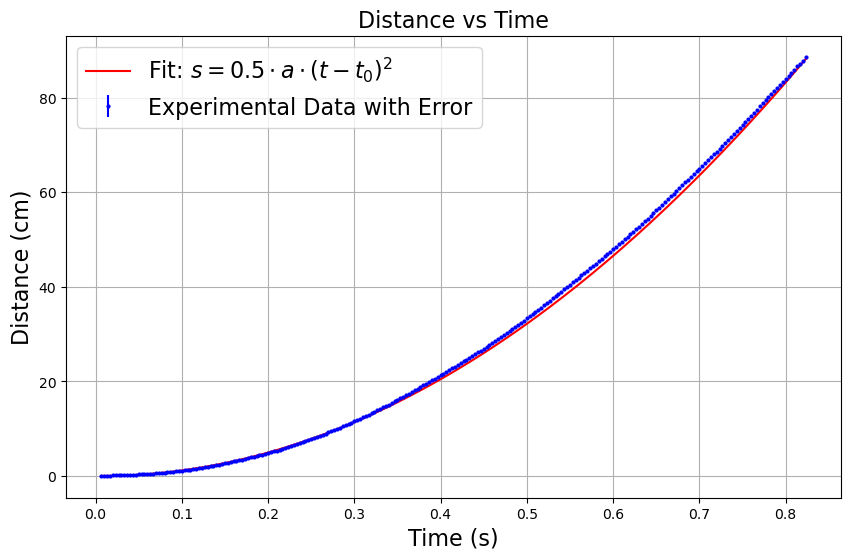

In [200]:
# Ensure all lists are the same length before filtering
min_length = min(len(time_selected), len(s), len(err_s))
time_selected = time_selected[:min_length]
s = s[:min_length]
err_s = err_s[:min_length]

# Filter time_selected, s, and err_s based on non-zero values in s
filtered_data = [
    (t, si, err) for t, si, err in zip(time_selected, s, err_s) if si != 0
]

if not filtered_data:
    raise ValueError("No valid data points left after filtering!")

# Unpack the filtered data into separate lists
time_selected, s, err_s = zip(*filtered_data)

# Convert filtered data back to lists
time_selected = list(time_selected)
s = list(s)
err_s = list(err_s)

# Check lengths after filtering
print(f"Filtered lengths: time_selected={len(time_selected)}, s={len(s)}, err_s={len(err_s)}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.errorbar(time_selected, s, yerr=err_s, fmt='bo', markersize=2, label='Experimental Data with Error')
plt.plot(time_selected, result.best_fit[:len(time_selected)], 'r-', label=r'Fit: $s = 0.5 \cdot a \cdot (t - t_0)^2$')
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Distance (cm)', fontsize=16)
plt.title('Distance vs Time', fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.show()


Import data

In [188]:
# All datasets, angles and start/end-values
datasets = {
    '5.29': {
    'file': 'C:/Natuurkunde/NSP2/Data/10cm_holle_cilinder_verbeterd.mqa',
    'start_index':226,
    'end_index':770},       
    '8.49': {
    'file':'C:/Natuurkunde/NSP2/Data/16cm_holle_cilinder.mqa',
    'start_index':216,
    'end_index':655},
    '11.71': {
    'file': 'C:/Natuurkunde/NSP2/Data/22cm_holle_cilinder.mqa',
    'start_index':194,
    'end_index':572},       
    '14.97': {
    'file':'C:/Natuurkunde/NSP2/Data/28cm_holle_cilinder.mqa',
    'start_index':169,
    'end_index':503},   
    '18.28': {
    'file':'C:/Natuurkunde/NSP2/Data/34cm_holle_cilinder.mqa',
    'start_index':164,
    'end_index':465},
    '21.65': {
    'file': 'C:/Natuurkunde/NSP2/Data/40cm_holle_cilinder.mqa',
    'start_index':246,
    'end_index':523},       
    '25.11': {
    'file':'C:/Natuurkunde/NSP2/Data/46cm_holle_cilinder.mqa',
    'start_index':382,
    'end_index':630},
    '28.67': {
    'file':'C:/Natuurkunde/NSP2/Data/52cm_holle_cilinder.mqa',
    'start_index':214,
    'end_index':464},
}

Fit $a$

In [ ]:
# Initialize storage for results
results = []
list_alpha = []

# Loop over each dataset
for alpha_label, dataset_info in datasets.items():
    file_path = dataset_info['file']
    start_index = dataset_info['start_index']
    end_index = dataset_info['end_index']
    
    df = pd.read_csv(file_path, sep='\t', header=0)
    
    # Extract time, x-position, and y-position
    time = df['Time']
    x_position = df['Point #1.X']
    y_position = df['Point #1.Y']
    
    # Slice the data based on the manually specified range
    time_selected = time.iloc[start_index:end_index].reset_index(drop=True)
    x_position_selected = x_position.iloc[start_index:end_index].reset_index(drop=True)
    y_position_selected = y_position.iloc[start_index:end_index].reset_index(drop=True)

    # Adjust data to start at (0, 0)
    x_position_adjusted = x_position_selected - x_position_selected.iloc[0]
    y_position_adjusted = y_position_selected - y_position_selected.iloc[0]
    time_adjusted = time_selected - time_selected.iloc[0]
    
    # Calculate distance s
    s = np.sqrt(x_position_adjusted**2 + y_position_adjusted**2)
    
    # Ensure lengths match
    min_length = min(len(time_adjusted), len(s), len(weights))
    time_adjusted = time_adjusted[:min_length]
    s = s[:min_length]
    weights = weights[:min_length]
    
    # Define the theoretical model function for s
    def theoretical_s(t, a, t_0):
        return 0.5 * a * (t - t_0)**2
    
    # Use lmfit Model to define the model and fit the data
    model = Model(theoretical_s)
    params = model.make_params(a=1, t_0=0)  # Initial guess for parameters

    # Fit the model to the data
    try:
        result = model.fit(s, params, t=time_adjusted, weights = weights)
        fitted_a = result.params['a'].value
        a_std = result.params['a'].stderr
        reduced_chi_squared = result.redchi
    except Exception as e:
        print(f"Error fitting data for alpha {alpha_label}: {e}")
        continue
    
    alpha = float(alpha_label)
    
    list_alpha.append(float(alpha_label))
    
    # Store the result
    results.append({'alpha': alpha, 'a': fitted_a, 'err':a_std, 'red. chi^2':reduced_chi_squared})

# Convert results to a DataFrame for further use
results_df = pd.DataFrame(results)

# Display the data ready for plotting
print(results_df)


Error fitting data for alpha 5.29: operands could not be broadcast together with shapes (544,) (248,) (544,) 
Error fitting data for alpha 8.49: operands could not be broadcast together with shapes (439,) (248,) (439,) 
Error fitting data for alpha 11.71: operands could not be broadcast together with shapes (378,) (248,) (378,) 
Error fitting data for alpha 14.97: operands could not be broadcast together with shapes (334,) (248,) (334,) 
Error fitting data for alpha 18.28: operands could not be broadcast together with shapes (301,) (248,) (301,) 
Error fitting data for alpha 21.65: operands could not be broadcast together with shapes (277,) (248,) (277,) 
Error fitting data for alpha 28.67: operands could not be broadcast together with shapes (250,) (248,) (250,) 
   alpha           a      err  red. chi^2
0  25.11  231.794671  0.68926   10.016902


Plot $a$ and $\alpha$

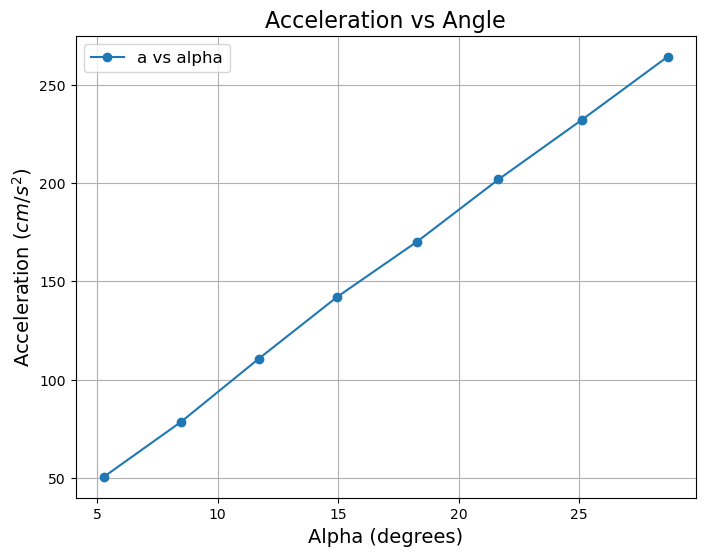

In [190]:
plt.figure(figsize=(8, 6))
plt.plot(results_df['alpha'], results_df['a'], 'o-', label='a vs alpha')
plt.xlabel('Alpha (degrees)', fontsize=14)
plt.ylabel('Acceleration ($cm$/$s^2$)', fontsize=14)
plt.title('Acceleration vs Angle', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
#plt.savefig('a_vs_alpha_zonder_fit_en_error.png')
plt.show()

Fit $B$

In [191]:
# Gravitational constant (m/s^2)
g = 9.81

# Convert alpha to radians
results_df['alpha_radians'] = np.radians(results_df['alpha'])

# Define the fitting function
def acceleration_model(alpha, B):
    return g * np.sin(alpha) / B

# Create the model
model = Model(acceleration_model)

# Perform the fit
params = model.make_params(B=1)  # Initial guess for B
result = model.fit(results_df['a'], params, alpha=results_df['alpha_radians'], weights=1/results_df['err'])

# Display the fit report
print(result.fit_report())

# Extract the fitted parameter and its uncertainty
fitted_B = result.params['B'].value
fitted_B_error = result.params['B'].stderr

print(f"Fitted B: {fitted_B} ± {fitted_B_error}")


[[Model]]
    Model(acceleration_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 8
    # variables        = 1
    chi-square         = 387.492503
    reduced chi-square = 55.3560719
    Akaike info crit   = 33.0420397
    Bayesian info crit = 33.1214812
    R-squared          = 0.99009964
[[Variables]]
    B:  0.01801326 +/- 8.2592e-05 (0.46%) (init = 1)
Fitted B: 0.018013262764933036 ± 8.259224674834745e-05


Plot $a$ vs $\alpha$ and fit 

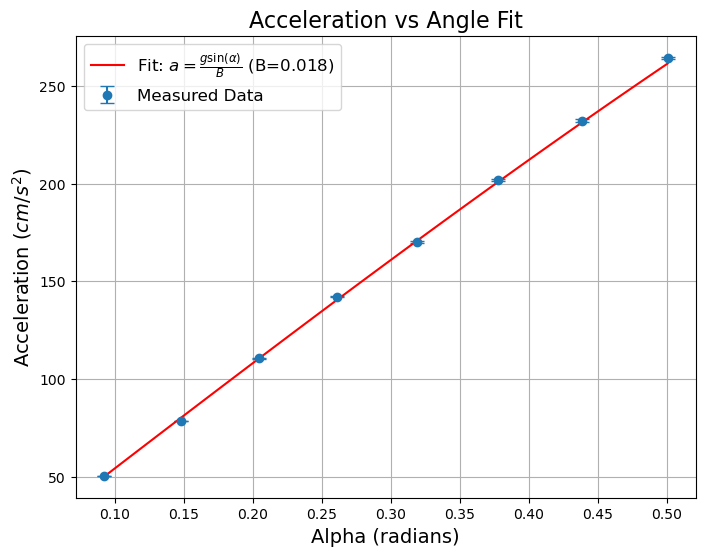

In [192]:
# Generate data for plotting the fit
alpha_fine = np.linspace(results_df['alpha_radians'].min(), results_df['alpha_radians'].max(), 100)
fitted_a = acceleration_model(alpha_fine, fitted_B)

# Plot data and the fit
plt.figure(figsize=(8, 6))
plt.errorbar(
    results_df['alpha_radians'],
    results_df['a'],
    yerr=results_df['err'],
    fmt='o',
    label='Measured Data',
    capsize=5
)
plt.plot(alpha_fine, fitted_a, 'r-', label=f'Fit: $a = \\frac{{g \\sin(\\alpha)}}{{B}}$ (B={fitted_B:.3f})')
plt.xlabel('Alpha (radians)', fontsize=14)
plt.ylabel('Acceleration ($cm$/$s^2$)', fontsize=14)
plt.title('Acceleration vs Angle Fit', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
#plt.savefig('a_vs_alpha_met_fit_en_error.png')
plt.show()